In [38]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score


In [40]:

import re
import string

# Text cleaning
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df['message'] = df['message'].str.lower()
df['message'] = df['message'] = df['message'].str.replace(r'\d+', '', regex=True)
df['message'] = df['message'] = df['message'].str.replace(r'[^\w\s]', '', regex=True)
df['message'] = df['message'].str.strip()
df.head()

#Load and prepare data
df = pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['label', 'message'])
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
X = df['message']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Split data
X = df['message']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Vectorize text
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), min_df=2)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [64]:

#Define models with their names
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Naive Bayes", MultinomialNB()),
    ("Support Vector Machine", LinearSVC())
]

#Define corresponding hyperparameter grids
params_1 = [
    {'clf__C': [0.001, 0.01, 0.1, 1, 10, 100]},              # LR
    {'clf__alpha': [0.001, 0.01, 0.1, 1, 10]},               # NB
    {'clf__C': [0.001, 0.01, 0.1, 1, 10, 100]}               # SVM
]



In [68]:
#Define nested cross-validation function
def nested_cv(model, param_grid, X, y, scoring='f1_weighted'):
    pipe = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english', ngram_range=(1, 2), min_df=2)),
        ('clf', model)
    ])
    grid = GridSearchCV(pipe, param_grid, cv=3, scoring=scoring)
    scores = cross_val_score(grid, X, y, cv=5, scoring=scoring)
    grid.fit(X, y)
    return {
        'scores': scores,
        'mean_score': scores.mean(),
        'std_score': scores.std(),
        'best_params': grid.best_params_
    }

#Execute nested CV and print results
scores_list = []
for model, param_grid in zip(models, params_1):
    print(f'📊 Outputs for {model[0]}:')
    res = nested_cv(model[1], param_grid, X, y, scoring='f1_weighted')
    scores_list.append(res['scores'])
    print(f"\t✅ Mean score: {res['mean_score']:.4f}")
    print(f"\t± Std deviation: {res['std_score']:.4f}")
    print(f"\t🏅 Best parameters: {res['best_params']}")
    print("-----------")

#Execute and store results
results_table = []
for model, param_grid in zip(models, params_1):
    print(f"🔍 {model[0]}")
    res = nested_cv(model[1], param_grid, X, y, scoring='f1_weighted')
    results_table.append({
        "Model": model[0],
        "Best Parameter": res['best_params'],
        "Mean": round(res['mean_score'], 4),
        "Std Dev": round(res['std_score'], 4)
    })

#Create results table
results_df = pd.DataFrame(results_table)
print(results_df)

📊 Outputs for Logistic Regression:
	✅ Mean score: 0.9817
	± Std deviation: 0.0020
	🏅 Best parameters: {'clf__C': 10}
-----------
📊 Outputs for Naive Bayes:
	✅ Mean score: 0.9837
	± Std deviation: 0.0033
	🏅 Best parameters: {'clf__alpha': 0.1}
-----------
📊 Outputs for Support Vector Machine:


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/

	✅ Mean score: 0.9822
	± Std deviation: 0.0027
	🏅 Best parameters: {'clf__C': 1}
-----------
🔍 Logistic Regression
🔍 Naive Bayes
🔍 Support Vector Machine


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/

                    Model       Best Parameter    Mean  Std Dev
0     Logistic Regression       {'clf__C': 10}  0.9817   0.0020
1             Naive Bayes  {'clf__alpha': 0.1}  0.9837   0.0033
2  Support Vector Machine        {'clf__C': 1}  0.9822   0.0027


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [81]:
#Models Training and Evaluation

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='liblinear'),
    "Naive Bayes": MultinomialNB(),
    "Support Vector Machine": LinearSVC()
}

# Evaluate each model
report_outputs = []
for name, model in models.items():
    print(f"\n{name}")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    # Probability scores for ROC AUC
    if hasattr(model, 'decision_function'):
        y_scores = model.decision_function(X_test_tfidf)
    else:
        y_scores = model.predict_proba(X_test_tfidf)[:, 1]
    
    auc = roc_auc_score(y_test, y_scores)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("ROC AUC Score:", auc)



Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

ROC AUC Score: 0.9856184084372003

Naive Bayes
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.78      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

ROC AUC Score: 0.9875984826378758

Support Vector Machine
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.98      0.87      0.9

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


<Figure size 600x400 with 0 Axes>

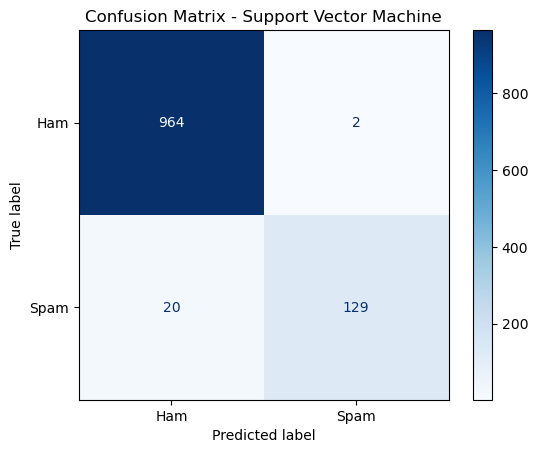

In [85]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#SVM Training
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

#Predict and Create Confusion Matrix
y_pred_svm = svm_model.predict(X_test_tfidf)
cm = confusion_matrix(y_test, y_pred_svm, labels=[0, 1])

#Show Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
plt.figure(figsize=(6, 4))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Support Vector Machine")
plt.grid(False)
plt.show()
